In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
import pandas as pd

In [3]:

df = pd.DataFrame({
    "soil_moisture": [0.10, 0.15, 0.20, 0.25, 0.40, 0.60, 0.35, 0.18,
                      0.45, 0.05, 0.80, 0.27, 0.55, 0.70, 0.12, 0.30],
    "temperature_c": [34, 30, 26, 22, 28, 30, 19, 22,
                      35, 24, 33, 33, 21, 25, 20, 29],
    "sunlight_hours": [9, 8, 7, 4, 8, 10, 3, 10,
                       12, 5, 9, 11, 2, 6, 1, 9],
    "needs_water": [1, 1, 1, 0, 0, 0, 0, 1,
                    0, 1, 0, 1, 0, 0, 1, 1]})

In [4]:
df

,soil_moisture,temperature_c,sunlight_hours,needs_water
0,0.10,34,9,1
1,0.15,30,8,1
2,0.20,26,7,1
3,0.25,22,4,0
4,0.40,28,8,0
5,0.60,30,10,0
6,0.35,19,3,0
7,0.18,22,10,1
8,0.45,35,12,0
9,0.05,24,5,1


In [5]:
X = df[['soil_moisture', 'temperature_c', 'sunlight_hours']]
y = df['needs_water']

In [6]:
from sklearn.preprocessing import minmax_scale
X_scaled = minmax_scale(
    df[["soil_moisture", "temperature_c", "sunlight_hours"]])
X_scaled

array([[0.06666667, 0.9375    , 0.72727273],
       [0.13333333, 0.6875    , 0.63636364],
       [0.2       , 0.4375    , 0.54545455],
       [0.26666667, 0.1875    , 0.27272727],
       [0.46666667, 0.5625    , 0.63636364],
       [0.73333333, 0.6875    , 0.81818182],
       [0.4       , 0.        , 0.18181818],
       [0.17333333, 0.1875    , 0.81818182],
       [0.53333333, 1.        , 1.        ],
       [0.        , 0.3125    , 0.36363636],
       [1.        , 0.875     , 0.72727273],
       [0.29333333, 0.875     , 0.90909091],
       [0.66666667, 0.125     , 0.09090909],
       [0.86666667, 0.375     , 0.45454545],
       [0.09333333, 0.0625    , 0.        ],
       [0.33333333, 0.625     , 0.72727273]])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42, stratify=y)

In [8]:
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(8, activation='relu', input_shape=(3,)),
    layers.Dense(1,activation='sigmoid')])

d:\Github\Machinelearning\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam',loss = "binary_crossentropy",metrics=['accuracy'])

In [10]:
history_full = model.fit(X_train, y_train, epochs=100, batch_size=6,
                         validation_data=(X_test, y_test))

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 426ms/step - accuracy: 0.5000 - loss: 0.7012 - val_accuracy: 0.5000 - val_loss: 0.7474
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.5000 - loss: 0.7002 - val_accuracy: 0.5000 - val_loss: 0.7466
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.5000 - loss: 0.6996 - val_accuracy: 0.5000 - val_loss: 0.7458
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.5000 - loss: 0.6989 - val_accuracy: 0.5000 - val_loss: 0.7449
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.5000 - loss: 0.6980 - val_accuracy: 0.5000 - val_loss: 0.7441
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.5000 - loss: 0.6975 - val_accuracy: 0.5000 - val_loss: 0.7433
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.5000 - loss: 0.6967 - val_accuracy: 0.5000 - val_loss: 0.7425
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.5000 - loss: 0.6961 - val_accuracy: 0.5000 - val_loss

In [11]:
history_minibatch = model.fit(X_train, y_train, epochs=100, batch_size=100, verbose=1)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 985ms/step - accuracy: 0.6667 - loss: 0.6361
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6667 - loss: 0.6358
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6667 - loss: 0.6355
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.6667 - loss: 0.6352
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.6667 - loss: 0.6349
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.6667 - loss: 0.6346
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.6667 - loss: 0.6342
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.6667 - loss: 0.6339
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.6667 - loss: 0.6336
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6667 - loss: 0.6333
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.6667 - loss: 0.6330
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6667 - l

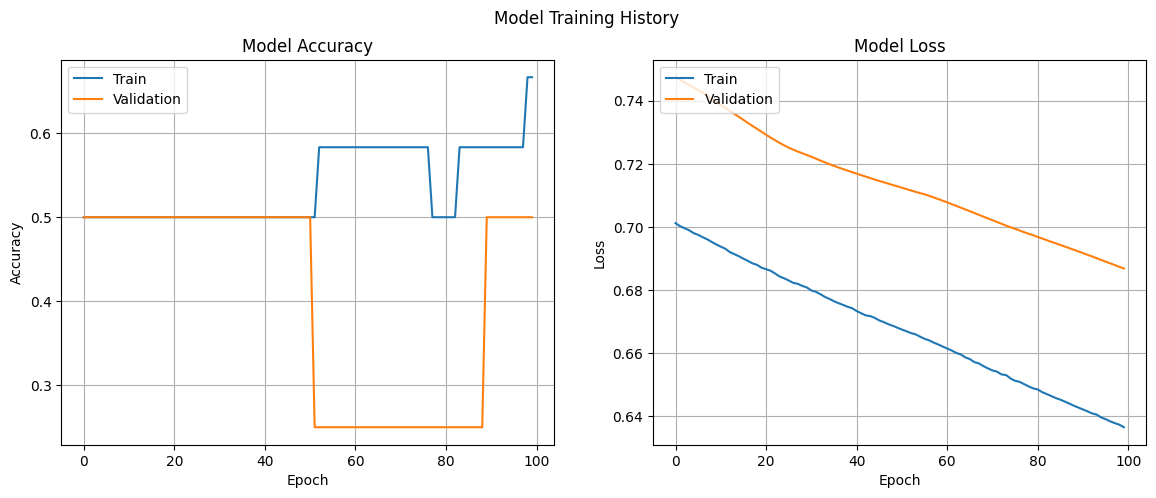

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
# Plot training & validation accuracy values
ax1.plot(history_full.history['accuracy'])
ax1.plot(history_full.history['val_accuracy'])
ax1.set_title('Model Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Validation'], loc='upper left')
ax1.grid(True)


# Plot training & validation loss values
ax2.plot(history_full.history['loss'])
ax2.plot(history_full.history['val_loss'])
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Validation'], loc='upper left')
ax2.grid(True)

plt.suptitle('Model Training History')
plt.show()